In [1]:
!wget "https://www.dropbox.com/sh/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa?dl=0"

--2020-07-22 12:04:32--  https://www.dropbox.com/sh/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa [following]
--2020-07-22 12:04:32--  https://www.dropbox.com/sh/raw/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc914a757cbf603a46486bde7431.dl.dropboxusercontent.com/zip_download_get/AfZb-IRFtZ_EAg8f_Es8OvYtUJK33qppXJ7oucoweiJxsPACMC_A4wGGIOVMokL8A6x9XmNi06zuk6DWCYPgEguKZnWon8Dknf1j09RzFKMmhg [following]
--2020-07-22 12:04:34--  https://uc914a757cbf603a46486bde7431.dl.dropboxusercontent.com/zip_download_get/AfZb-IRFtZ_EAg8f_Es8OvYtUJK33qppXJ7oucoweiJxsPACMC_A4wGGIOVMokL8A6x9XmNi06zuk6DWC

In [2]:
! mkdir images

In [3]:
!unzip AAB-193KAr7qhFrwbwBENjPNa?dl=0 -d images/

Archive:  AAB-193KAr7qhFrwbwBENjPNa?dl=0
mapname:  conversion of  failed
   creating: images/cats/
   creating: images/dogs/
   creating: images/humans/
   creating: images/horses/
 extracting: images/dogs/dog.3.jpg   
 extracting: images/cats/cat.3.jpg   
 extracting: images/dogs/dog.9.jpg   
 extracting: images/cats/cat.6.jpg   
 extracting: images/dogs/dog.4.jpg   
 extracting: images/cats/cat.8.jpg   
 extracting: images/dogs/dog.5.jpg   
 extracting: images/cats/cat.7.jpg   
 extracting: images/dogs/dog.2.jpg   
 extracting: images/dogs/dog.8.jpg   
 extracting: images/cats/cat.5.jpg   
 extracting: images/dogs/dog.7.jpg   
 extracting: images/cats/cat.2.jpg   
 extracting: images/dogs/dog.1.jpg   
 extracting: images/cats/cat.4.jpg   
 extracting: images/cats/cat.1.jpg   
 extracting: images/dogs/dog.6.jpg   
 extracting: images/cats/cat.9.jpg   
 extracting: images/dogs/dog.57.jpg  
 extracting: images/cats/cat.15.jpg  
 extracting: images/dogs/dog.76.jpg  
 extracting: images/c

In [14]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
if not os.path.isdir("val_images"):
  os.mkdir("val_images")

In [ ]:
classes = ['cats', 'dogs', 'horses', 'humans']

In [ ]:
for c in classes:
  if not os.path.isdir("val_images/" + c):
    os.mkdir("val_images/" + c)


In [ ]:
split = 0.9
for dirc in os.listdir("images"):
  p = "images/" + dirc
  imgs = os.listdir(p)
  split_size = int(len(imgs)*split)
  files_to_move =  imgs[split_size:]
  print(files_to_move)
  print()
  for f in files_to_move:
    src = os.path.join(p,f)
    dest = os.path.join("val_images/",dirc)
    shutil.move(src,dest)

['dog.74.jpg', 'dog.71.jpg', 'dog.90.jpg', 'dog.133.jpg', 'dog.72.jpg', 'dog.158.jpg', 'dog.33.jpg', 'dog.127.jpg', 'dog.182.jpg', 'dog.137.jpg', 'dog.91.jpg', 'dog.6.jpg', 'dog.171.jpg', 'dog.104.jpg', 'dog.161.jpg', 'dog.168.jpg', 'dog.101.jpg', 'dog.146.jpg', 'dog.102.jpg', 'dog.175.jpg', 'dog.42.jpg']

['rider-96.jpg', 'rider-112.jpg', 'rider-17.jpg', 'rider-41.jpg', 'rider-45.jpg', 'rider-29.jpg', 'rider-120.jpg', 'rider-133.jpg', 'rider-93.jpg', 'rider-188.jpg', 'rider-193.jpg', 'rider-102.jpg', 'rider-39.jpg', 'rider-103.jpg', 'rider-32.jpg', 'rider-20.jpg', 'rider-136.jpg', 'rider-117.jpg', 'rider-137.jpg', 'rider-74.jpg', 'rider-44.jpg']

['cat.26.jpg', 'cat.90.jpg', 'cat.43.jpg', 'cat.180.jpg', 'cat.83.jpg', 'cat.173.jpg', 'cat.79.jpg', 'cat.164.jpg', 'cat.69.jpg', 'cat.142.jpg', 'cat.68.jpg', 'cat.153.jpg', 'cat.192.jpg', 'cat.170.jpg', 'cat.143.jpg', 'cat.70.jpg', 'cat.152.jpg', 'cat.37.jpg', 'cat.157.jpg', 'cat.177.jpg', 'cat.29.jpg']

['horse-15.jpg', 'horse-129.jpg', 'ho

In [ ]:
for dirc in os.listdir("images/"):
    p = "images/" + dirc
    if "." in p:
        continue
    img = os.listdir(p)
    print(dirc, len(img))

dogs 181
humans 181
cats 181
horses 181


In [ ]:
for dirc in os.listdir("val_images/"):
    p = "val_images/" + dirc
    if "." in p:
        continue
    img = os.listdir(p)
    print(dirc, len(img))

dogs 21
humans 21
cats 21
horses 21


<h1>Image Augmentation</h1>

In [ ]:
from keras.preprocessing import image


Using TensorFlow backend.


In [ ]:
train_datagen = image.ImageDataGenerator(rotation_range=20,
                                         width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         shear_range = 0.2,
                                         zoom_range=0.3,
                                         horizontal_flip = True
                                         )

In [ ]:
val_datagen = image.ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("images/",
                                  target_size=(224,224),  # image ka size
                                  class_mode='categorical',
                                  shuffle=True,
                                  batch_size=32 )

Found 724 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1, 'horses': 2, 'humans': 3}

In [ ]:
d, l = next(train_generator)

In [ ]:
d.shape, l.shape

((32, 224, 224, 3), (32, 4))

In [ ]:
d[0]

array([[[ 92.573074,  88.22642 ,  59.23985 ],
        [ 78.49234 ,  75.27182 ,  54.75383 ],
        [ 71.86476 ,  70.117035,  58.06762 ],
        ...,
        [ 57.548584,  58.548584,  52.548584],
        [ 56.684525,  56.315475,  53.05357 ],
        [ 56.243805,  55.243805,  53.243805]],

       [[143.84106 , 139.24284 ,  89.70089 ],
        [129.09071 , 123.54675 ,  80.791245],
        [106.63058 , 101.82302 ,  67.53608 ],
        ...,
        [ 56.22741 ,  57.22741 ,  51.22741 ],
        [ 56.985184,  55.985184,  53.985184],
        [ 56.086487,  55.086487,  53.086487]],

       [[146.32434 , 149.68217 ,  92.60865 ],
        [147.43297 , 148.82124 ,  92.69414 ],
        [145.22377 , 142.93005 ,  90.85314 ],
        ...,
        [ 56.27344 ,  56.72656 ,  51.820328],
        [ 56.65489 ,  55.65489 ,  53.65489 ],
        [ 56.416782,  55.416782,  53.416782]],

       ...,

       [[ 42.53769 ,  38.53769 ,  35.53769 ],
        [ 35.435364,  34.797424,  32.63794 ],
        [ 36.736553,  

[0. 0. 0. 1.]


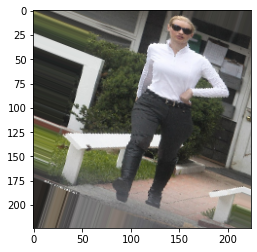

In [ ]:
plt.imshow(d[0].astype('int'))
print(l[0])

In [ ]:
val_generator = val_datagen.flow_from_directory("val_images/", 
                                                target_size=(224,224), 
                                                class_mode='categorical', 
                                                batch_size=32)

Found 84 images belonging to 4 classes.


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions

import numpy as np

In [ ]:
resnet = ResNet50(include_top = True,weights = "imagenet")

102858752/102853048 [==============================] - 4s 0us/step


In [ ]:
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Model
x = resnet.layers[-2].output
fc1 = Dense(4,activation = "softmax")(x)

In [ ]:
my_model = Model(inputs=resnet.input,outputs = fc1)

In [ ]:
# Freezing All Layers
for l in my_model.layers[:-2]:
    #print(l)
    l.trainable = False
my_model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

In [ ]:
my_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
hist = my_model.fit_generator(train_generator,steps_per_epoch=724//32,epochs=10,
                              validation_data=val_generator,validation_steps=81//32)

Epoch 1/10
22/22 [==============================] - 16s 743ms/step - loss: 0.8795 - accuracy: 0.6532 - val_loss: 0.3830 - val_accuracy: 0.8750
Epoch 2/10
22/22 [==============================] - 9s 402ms/step - loss: 0.2817 - accuracy: 0.9133 - val_loss: 0.0508 - val_accuracy: 0.9808
Epoch 3/10
22/22 [==============================] - 9s 397ms/step - loss: 0.1889 - accuracy: 0.9451 - val_loss: 0.0879 - val_accuracy: 0.9615
Epoch 4/10
22/22 [==============================] - 9s 403ms/step - loss: 0.1807 - accuracy: 0.9480 - val_loss: 0.0194 - val_accuracy: 0.9688
Epoch 5/10
22/22 [==============================] - 9s 411ms/step - loss: 0.1535 - accuracy: 0.9610 - val_loss: 0.0642 - val_accuracy: 0.9615
Epoch 6/10
22/22 [==============================] - 9s 405ms/step - loss: 0.1000 - accuracy: 0.9759 - val_loss: 0.0998 - val_accuracy: 0.9615
Epoch 7/10
22/22 [==============================] - 9s 401ms/step - loss: 0.0920 - accuracy: 0.9735 - val_loss: 0.0889 - val_accuracy: 0.9531
Epoch

In [ ]:
y_pred = my_model.predict_generator(val_generator)

In [ ]:
my_model.evaluate_generator(val_generator)

[0.03405066207051277, 1.0]

In [ ]:
y_prediction = []
for i in range(len(y_pred)):
  y_prediction.append(np.argmax(y_pred[i]))

In [ ]:
y_prediction

[2,
 0,
 0,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 0,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 0,
 0,
 2,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 3,
 0,
 2,
 2,
 3,
 0,
 1,
 2,
 2,
 1,
 3,
 1,
 0,
 1,
 0,
 2,
 3,
 2,
 0,
 0,
 3,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 3,
 2,
 1,
 1,
 3,
 0,
 2,
 3,
 1,
 0,
 3,
 2,
 2,
 0,
 3,
 3,
 1,
 3]

# Check your Predictions

In [ ]:
def load_all_test_images(category):
  X_test = []
  all_images = os.listdir("val_images/"+ category)
  for i in all_images:
    im = image.load_img("val_images/"+category+"/"+i, target_size=(224,224))
    im = np.array(im)
    X_test.append(im)

  return np.array(X_test)

In [ ]:
X_test = load_all_test_images("cats")

In [ ]:
np.argmax(my_model.predict(X_test), axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_test = load_all_test_images("dogs")

In [ ]:
np.argmax(my_model.predict(X_test), axis = 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_test = load_all_test_images("horses")
np.argmax(my_model.predict(X_test), axis = 1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_test = load_all_test_images("humans")
np.argmax(my_model.predict(X_test), axis = 1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Reading Files Methods

In [52]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical

import numpy as np

In [17]:
dic = {'cats' : 0, 'dogs': 1, 'horses': 2, 'humans' :3}

In [18]:
rev_dic  = {v: k for k, v in dic.items()}

In [55]:
X = []
y = []
for folder in os.listdir("images/"):
  p = "images/"+ folder
  all_images = os.listdir(p)
  print(p)
  for im in all_images:
    im = image.load_img(os.path.join(p,im), target_size=(224,224))
    im = np.array(im)
    im = preprocess_input(im)
    X.append(im)
    y.append(dic[folder])

images/dogs
images/humans
images/cats
images/horses


In [56]:
X = np.array(X)
y = np.array(y)

In [57]:
from sklearn.utils import shuffle

In [58]:
X, y = shuffle(X, y, random_state = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


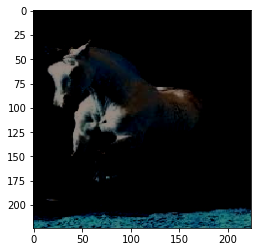

In [63]:
plt.imshow(X[12].astype('int'))
print(y[12])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [67]:
resnet = ResNet50(include_top = True,weights = "imagenet")

In [68]:
x = resnet.layers[-2].output
fc1 = Dense(4,activation = "softmax")(x)

In [69]:
my_model = Model(inputs=resnet.input,outputs = fc1)

In [70]:
# Freezing All Layers
for l in my_model.layers[:-2]:
    #print(l)
    l.trainable = False
my_model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

In [71]:
my_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [72]:
hist = my_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, shuffle = True)

Train on 617 samples, validate on 69 samples
Epoch 1/10
617/617 [==============================] - 10s 15ms/step - loss: 0.7427 - accuracy: 0.7212 - val_loss: 0.1941 - val_accuracy: 0.9130
Epoch 2/10
617/617 [==============================] - 7s 11ms/step - loss: 0.1550 - accuracy: 0.9514 - val_loss: 0.1088 - val_accuracy: 0.9420
Epoch 3/10
617/617 [==============================] - 7s 11ms/step - loss: 0.0822 - accuracy: 0.9838 - val_loss: 0.0824 - val_accuracy: 0.9565
Epoch 4/10
617/617 [==============================] - 7s 11ms/step - loss: 0.0461 - accuracy: 0.9951 - val_loss: 0.0698 - val_accuracy: 0.9565
Epoch 5/10
617/617 [==============================] - 7s 11ms/step - loss: 0.0462 - accuracy: 0.9903 - val_loss: 0.0717 - val_accuracy: 0.9565
Epoch 6/10
617/617 [==============================] - 7s 11ms/step - loss: 0.0342 - accuracy: 0.9951 - val_loss: 0.0535 - val_accuracy: 0.9710
Epoch 7/10
617/617 [==============================] - 7s 11ms/step - loss: 0.0371 - accuracy: 0.

In [75]:
my_model.evaluate(X_test, y_test)

122/122 [==============================] - 1s 11ms/step


[0.05878207362333282, 0.9672130942344666]

In [79]:
y_pred = np.argmax(my_model.predict(X_test), axis=1)

In [94]:
(np.argmax(y_test, axis=1) == y_pred).sum()/y_pred.shape[0]

0.9672131147540983